[the paper](https://onlinelibrary.wiley.com/doi/10.1107/S0365110X67000970)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sympy
from sympy import *
from sympy.ntheory import binomial_coefficients_list
from galgebra import *
from galgebra.ga import Ga
from galgebra.mv import cross
from galgebra.printer import latex
from IPython.display import Math

# tell sympy to use latex printing by default
sympy.init_printing(latex_printer=latex, use_latex="mathjax")

# use galgebra vectors and operations even though
# everything in this notebook will be vector algebra
xyz = (x, y, z) = sympy.symbols("x y z", real=True)
o3d = Ga("e_1 e_2 e_3", g=[1, 1, 1], coords=xyz)

#%matplotlib widget

# Definition of diffractometer angles

define lattice vectors (a1, a2, a3) and reciprocal lattice vectors (b1, b2, b3)

In [2]:
e1, e2, e3 = o3d.mv()
(a1_1, a1_2, a1_3) = sympy.symbols("a1_1 a1_2 a1_3", real=True)
(a2_1, a2_2, a2_3) = sympy.symbols("a2_1 a2_2 a2_3", real=True)
(a3_1, a3_2, a3_3) = sympy.symbols("a3_1 a3_2 a3_3", real=True)

a1 = a1_1*e1 + a1_2*e2 + a1_3*e3
a2 = a2_1*e1 + a2_2*e2 + a2_3*e3
a3 = a3_1*e1 + a3_2*e2 + a3_3*e3

b1 = cross(a2, a3) / (a1|cross(a2, a3))
b2 = cross(a3, a1) / (a2|cross(a3, a1))
b3 = cross(a1, a2) / (a3|cross(a1, a2))

def get_vector_coefficients(multivector):
    # return only the coefficients of e1, e2, e3
    return [c for c in multivector.blade_coefs()[1:4]]

b1_1, b1_2, b1_3 = get_vector_coefficients(b1)
b2_1, b2_2, b2_3 = get_vector_coefficients(b2)
b3_1, b3_2, b3_3 = get_vector_coefficients(b3)

define angles between lattice vectors (alpha1, alpha2, alpha3)

In [3]:
alpha1 = acos( (a2|a3).obj / (a2.norm()*a3.norm()) )
alpha2 = acos( (a3|a1).obj / (a3.norm()*a1.norm()) )
alpha3 = acos( (a1|a2).obj / (a1.norm()*a2.norm()) )

In [4]:
alpha1

acos((a2_1*a3_1 + a2_2*a3_2 + a2_3*a3_3)/(sqrt(a2_1**2 + a2_2**2 + a2_3**2)*sqrt(a3_1**2 + a3_2**2 + a3_3**2)))

define angles between reciprocal lattice vectors (beta1, beta2, beta3)

In [5]:
# norm2() is used here because norm() would not work with 
# the reciprocal lattice vectors (why?)
beta1 = acos( (b2|b3).obj / sqrt(b2.norm2()*b3.norm2()) )
beta2 = acos( (b3|b1).obj / sqrt(b3.norm2()*b1.norm2()) )
beta3 = acos( (b1|b2).obj / sqrt(b1.norm2()*b2.norm2()) )

In [6]:
# just trying to make b1.norm2() look nice
sqrt(factor(simplify(b1.norm2())))

sqrt((a2_1**2*a3_2**2 + a2_1**2*a3_3**2 - 2*a2_1*a2_2*a3_1*a3_2 - 2*a2_1*a2_3*a3_1*a3_3 + a2_2**2*a3_1**2 + a2_2**2*a3_3**2 - 2*a2_2*a2_3*a3_2*a3_3 + a2_3**2*a3_1**2 + a2_3**2*a3_2**2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)**2)

In [7]:
simplify(b1_1)

(a2_2*a3_3 - a2_3*a3_2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [8]:
simplify(b1_2)

(-a2_1*a3_3 + a2_3*a3_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [9]:
simplify(b1_3)

(a2_1*a3_2 - a2_2*a3_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [10]:
simplify(b2_1)

(-a1_2*a3_3 + a1_3*a3_2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [11]:
simplify(b2_2)

(a1_1*a3_3 - a1_3*a3_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [12]:
simplify(b2_3)

(-a1_1*a3_2 + a1_2*a3_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [13]:
simplify(b3_1)

(a1_2*a2_3 - a1_3*a2_2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [14]:
b3_2 = simplify(b3_2)
b3_2

(-a1_1*a2_3 + a1_3*a2_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [15]:
b3_3 = simplify(b3_3)
b3_3

(a1_1*a2_2 - a1_2*a2_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [16]:
def plot_lattice_vectors(u1, u2, u3, ax):
    # place u1, u2, u3 at the origin

    # draw a line from (x01, x02, x03) to (x11, x12, x13)
    # put coordinates into an array like this
    #   x01  x11
    #   x02  x12
    #   x03  x13
    u1_coords = np.zeros((3, 2))
    u1_coords[:, 1] = get_vector_coefficients(u1)
    u2_coords = np.zeros((3, 2))
    u2_coords[:, 1] = get_vector_coefficients(u2)
    u3_coords = np.zeros((3, 2))
    u3_coords[:, 1] = get_vector_coefficients(u3)

    ax.plot(u1_coords[0, :], u1_coords[1, :], u1_coords[2, :], c='r')
    ax.plot(u2_coords[0, :], u2_coords[1, :], u2_coords[2, :], c='g')
    ax.plot(u3_coords[0, :], u3_coords[1, :], u3_coords[2, :], c='b')


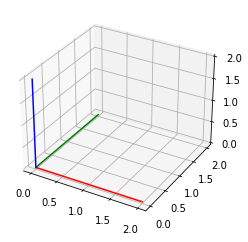

In [17]:
def plot_points(xyzs, ax):
    ax.scatter(xyzs[0, :], xyzs[1, :], xyzs[2, :], marker="o", c="b")

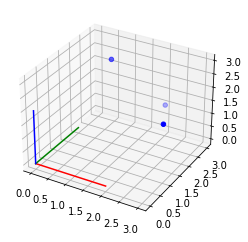

In [18]:
cubic_lattice = [
    (a1_1, 2), (a1_2, 0), (a1_3, 0),
    (a2_1, 0), (a2_2, 2), (a2_3, 0),
    (a3_1, 0), (a3_2, 0), (a3_3, 2),
]
cubic_a1 = a1.subs(cubic_lattice)
cubic_a2 = a2.subs(cubic_lattice)
cubic_a3 = a3.subs(cubic_lattice)

ax = plt.figure().add_subplot(projection='3d')
plot_lattice_vectors(cubic_a1, cubic_a2, cubic_a3, ax)

some_points = np.zeros((3,3))
some_points[:, 0] = [1, 2, 3]
some_points[:, 1] = [2, 3, 1]
some_points[:, 2] = [3, 1, 2]
plot_points(some_points, ax)

ax.xlim = [0, 2]
ax.ylim = ax.xlim
ax.zlim = ax.xlim
plt.show()

do some tests

In [19]:
print(f"alpha_1: {alpha1.subs(cubic_lattice).evalf()}")
print(f"alpha_2: {alpha2.subs(cubic_lattice).evalf()}")
print(f"alpha_3: {alpha3.subs(cubic_lattice).evalf()}")

alpha_1: 1.57079632679490
alpha_2: 1.57079632679490
alpha_3: 1.57079632679490


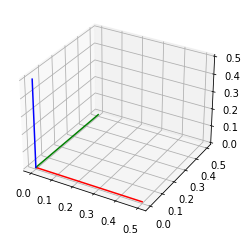

In [20]:
cubic_b1 = b1.subs(cubic_lattice)
cubic_b2 = b2.subs(cubic_lattice)
cubic_b3 = b3.subs(cubic_lattice)

ax = plt.figure().add_subplot(projection='3d')
plot_lattice_vectors(cubic_b1, cubic_b2, cubic_b3, ax)
ax.xlim = [0, 2]
ax.ylim = ax.xlim
ax.zlim = ax.xlim
plt.show()

In [21]:
print(f"beta_1: {beta1.subs(cubic_lattice).evalf()}")
print(f"beta_2: {beta2.subs(cubic_lattice).evalf()}")
print(f"beta_3: {beta3.subs(cubic_lattice).evalf()}")

beta_1: 1.57079632679490
beta_2: 1.57079632679490
beta_3: 1.57079632679490


Coordinate transformations

In [22]:
(v1, v2, v3) = sympy.symbols("v1 v2 v3", real=True)
v = (v1*b1) + (v2*b2) + (v3*b3)
collect(simplify(v.obj), (v1, v2, v3))

(v1*(a2_1*a3_2*e_3 - a2_1*a3_3*e_2 - a2_2*a3_1*e_3 + a2_2*a3_3*e_1 + a2_3*a3_1*e_2 - a2_3*a3_2*e_1) + v2*(-a1_1*a3_2*e_3 + a1_1*a3_3*e_2 + a1_2*a3_1*e_3 - a1_2*a3_3*e_1 - a1_3*a3_1*e_2 + a1_3*a3_2*e_1) + v3*(a1_1*a2_2*e_3 - a1_1*a2_3*e_2 - a1_2*a2_1*e_3 + a1_2*a2_3*e_1 + a1_3*a2_1*e_2 - a1_3*a2_2*e_1))/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

The "crystal cartesian axes" x,y,z are attached to b1, b2, b3 like this:
  - the x-axis is parallel to b1
    - b1_2 = 0
    - b1_3 = 0
  - the y-axis is in the b1-b2 plane
    - b2_3 = 0
  - the z-axis is perpendicular to the x-y plane (as usual)

In [23]:
crystal_cartesian_orientation = [
    (b1_2, 0), (b1_3, 0),
    (b2_3, 0)
]

In [24]:
# compare general b1 with b1 in crystal cartesian orientation
simplify(b1.obj)

((a2_1*a3_2 - a2_2*a3_1)*e_3 + (-a2_1*a3_3 + a2_3*a3_1)*e_2 + (a2_2*a3_3 - a2_3*a3_2)*e_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [25]:
simplify(b1.subs(crystal_cartesian_orientation).obj)

(a2_2*a3_3 - a2_3*a3_2)*e_1/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [26]:
# compare general b2 with b2 in crystal cartesian orientation
simplify(b2.obj)

((-a1_1*a3_2 + a1_2*a3_1)*e_3 + (a1_1*a3_3 - a1_3*a3_1)*e_2 + (-a1_2*a3_3 + a1_3*a3_2)*e_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [27]:
simplify(b2.subs(crystal_cartesian_orientation).obj)

((a1_1*a3_3 - a1_3*a3_1)*e_2 + (-a1_2*a3_3 + a1_3*a3_2)*e_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [28]:
# compare general b3 with b3 in crystal cartesian orientation
simplify(b3.obj)

((a1_1*a2_2 - a1_2*a2_1)*e_3 + (-a1_1*a2_3 + a1_3*a2_1)*e_2 + (a1_2*a2_3 - a1_3*a2_2)*e_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [29]:
simplify(b3.subs(crystal_cartesian_orientation).obj)

((a1_1*a2_2 - a1_2*a2_1)*e_3 + (-a1_1*a2_3 + a1_3*a2_1)*e_2 + (a1_2*a2_3 - a1_3*a2_2)*e_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [30]:
# compare general v with v in crystal cartesian orientation
# this does not seem to work - no simplification happens here
collect(simplify(v.obj), (v1, v2, v3))

(v1*(a2_1*a3_2*e_3 - a2_1*a3_3*e_2 - a2_2*a3_1*e_3 + a2_2*a3_3*e_1 + a2_3*a3_1*e_2 - a2_3*a3_2*e_1) + v2*(-a1_1*a3_2*e_3 + a1_1*a3_3*e_2 + a1_2*a3_1*e_3 - a1_2*a3_3*e_1 - a1_3*a3_1*e_2 + a1_3*a3_2*e_1) + v3*(a1_1*a2_2*e_3 - a1_1*a2_3*e_2 - a1_2*a2_1*e_3 + a1_2*a2_3*e_1 + a1_3*a2_1*e_2 - a1_3*a2_2*e_1))/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [31]:
collect(simplify(v.subs(crystal_cartesian_orientation).obj), (v1, v2, v3))

((v1*(a2_1*a3_2 - a2_2*a3_1) + v2*(-a1_1*a3_2 + a1_2*a3_1) + v3*(a1_1*a2_2 - a1_2*a2_1))*e_3 + (v1*(-a2_1*a3_3 + a2_3*a3_1) + v2*(a1_1*a3_3 - a1_3*a3_1) + v3*(-a1_1*a2_3 + a1_3*a2_1))*e_2 + (v1*(a2_2*a3_3 - a2_3*a3_2) + v2*(-a1_2*a3_3 + a1_3*a3_2) + v3*(a1_2*a2_3 - a1_3*a2_2))*e_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [32]:
v_c = v1*b1.subs(crystal_cartesian_orientation) + v2*b2.subs(crystal_cartesian_orientation) + v3*b3.subs(crystal_cartesian_orientation)
v_c

(a1_2*a2_3*v3 - a1_2*a3_3*v2 - a1_3*a2_2*v3 + a1_3*a3_2*v2 + a2_2*a3_3*v1 - a2_3*a3_2*v1)*e_1/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1) + (-a1_1*a2_3*v3 + a1_1*a3_3*v2 + a1_3*a2_1*v3 - a1_3*a3_1*v2)*e_2/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1) + v3*(a1_1*a2_2 - a1_2*a2_1)*e_3/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [33]:
v_c_x = v_c|e1
simplify(collect(v_c_x.obj, (v1, v2, v3)))

(v1*(a2_2*a3_3 - a2_3*a3_2) - v2*(a1_2*a3_3 - a1_3*a3_2) + v3*(a1_2*a2_3 - a1_3*a2_2))/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

a good question is: what is a2_2a3_3 - a2_3a3_2 ? part of the angle between a2 and a3 in the e2,e3 plane?

In [34]:
v_c_y = v_c|e2
simplify(collect(v_c_y.obj, (v1, v2, v3)))

(v2*(a1_1*a3_3 - a1_3*a3_1) - v3*(a1_1*a2_3 - a1_3*a2_1))/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [35]:
v_c_z = v_c|e3
simplify(collect(v_c_z.obj, (v1, v2, v3)))

v3*(a1_1*a2_2 - a1_2*a2_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [36]:
simplify(v_c_x.obj.coeff(v1))

(a2_2*a3_3 - a2_3*a3_2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

This B uses crystal cartesian orientation.

In [37]:
B = Matrix([
    [simplify(v_c_x.obj.coeff(v1)), simplify(v_c_x.obj.coeff(v2)), simplify(v_c_x.obj.coeff(v3))],
    [simplify(v_c_y.obj.coeff(v1)), simplify(v_c_y.obj.coeff(v2)), simplify(v_c_y.obj.coeff(v3))],
    [simplify(v_c_z.obj.coeff(v1)), simplify(v_c_z.obj.coeff(v2)), simplify(v_c_z.obj.coeff(v3))],
])
B

Matrix([
[(a2_2*a3_3 - a2_3*a3_2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1), (-a1_2*a3_3 + a1_3*a3_2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1),  (a1_2*a2_3 - a1_3*a2_2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)],
[                                                                                                                            0,  (a1_1*a3_3 - a1_3*a3_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1), (-a1_1*a2_3 + a1_3*a2_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)],
[                                                                                                                            0,                                                                                              

This B is for a cubic lattice with lattice vectors of length 2.

In [38]:
B_cubic = B.subs(cubic_lattice)
B_cubic

Matrix([
[1/2,   0,   0],
[  0, 1/2,   0],
[  0,   0, 1/2]])

the standard B matrix

In [39]:
# the norms of the reciprocal vectors are challenging
b1_mag = simplify(sqrt(factor(b1.norm2())))
b2_mag = simplify(sqrt(factor(b2.norm2())))
b3_mag = simplify(sqrt(factor(b3.norm2())))

In [40]:
b1_mag

sqrt((a2_1**2*a3_2**2 + a2_1**2*a3_3**2 - 2*a2_1*a2_2*a3_1*a3_2 - 2*a2_1*a2_3*a3_1*a3_3 + a2_2**2*a3_1**2 + a2_2**2*a3_3**2 - 2*a2_2*a2_3*a3_2*a3_3 + a2_3**2*a3_1**2 + a2_3**2*a3_2**2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)**2)

In [41]:
b2_mag

sqrt((a1_1**2*a3_2**2 + a1_1**2*a3_3**2 - 2*a1_1*a1_2*a3_1*a3_2 - 2*a1_1*a1_3*a3_1*a3_3 + a1_2**2*a3_1**2 + a1_2**2*a3_3**2 - 2*a1_2*a1_3*a3_2*a3_3 + a1_3**2*a3_1**2 + a1_3**2*a3_2**2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)**2)

In [42]:
b3_mag

sqrt((a1_1**2*a2_2**2 + a1_1**2*a2_3**2 - 2*a1_1*a1_2*a2_1*a2_2 - 2*a1_1*a1_3*a2_1*a2_3 + a1_2**2*a2_1**2 + a1_2**2*a2_3**2 - 2*a1_2*a1_3*a2_2*a2_3 + a1_3**2*a2_1**2 + a1_3**2*a2_2**2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)**2)

In [43]:
B_standard = Matrix([
    [b1_mag, b2_mag*cos(beta3),  b3_mag*cos(beta2)],
    [0,      b2_mag*sin(beta3), -1*b3_mag*sin(beta2)*cos(alpha1)],
    [0,      0,                  1/a3.norm()]
])
B_standard

Matrix([
[sqrt((a2_1**2*a3_2**2 + a2_1**2*a3_3**2 - 2*a2_1*a2_2*a3_1*a3_2 - 2*a2_1*a2_3*a3_1*a3_3 + a2_2**2*a3_1**2 + a2_2**2*a3_3**2 - 2*a2_2*a2_3*a3_2*a3_3 + a2_3**2*a3_1**2 + a2_3**2*a3_2**2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)**2),           sqrt((a1_1**2*a3_2**2 + a1_1**2*a3_3**2 - 2*a1_1*a1_2*a3_1*a3_2 - 2*a1_1*a1_3*a3_1*a3_3 + a1_2**2*a3_1**2 + a1_2**2*a3_3**2 - 2*a1_2*a1_3*a3_2*a3_3 + a1_3**2*a3_1**2 + a1_3**2*a3_2**2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)**2)*((-a1_1*a3_2/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1) + a1_2*a3_1/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1))*(a2_1*a3_2/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1) - a2_2*a3_1/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2

In [44]:
B_standard_cubic = B_standard.subs(cubic_lattice)
B_standard_cubic

Matrix([
[1/2,   0,   0],
[  0, 1/2,   0],
[  0,   0, 1/2]])